In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
respondents = pd.read_csv("atusdata/atusresp_2013.dat")
activities = pd.read_csv("atusdata/atusact_2013.dat")
info = pd.read_csv("atusdata/atuscps_2013.dat")

In [3]:
adults_crit = summary.TEAGE >= 18
child_crit = summary.TEAGE < 18
no_children_crit = summary.TRCHILDNUM == 0
male_crit = summary.TESEX == 1
female_crit = summary.TESEX == 2
not_married_crit = info.PEMARITL == 6
teenager_crit = summary.TEAGE <= 17

In [7]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

def ammend_data(data, constraints, col_list):
    new_data = data[constraints][col_list]
    return new_data

In [46]:
male_data = ammend_data(summary, male_crit & adults_crit & no_children_crit, ["tucaseid", 'TEAGE','TUFINLWGT', 'TESEX', "t010201", "t010401", 't160102', 't050101', 't050102', 't050401', 't050202'])
female_data = ammend_data(summary, female_crit & adults_crit & no_children_crit, ["tucaseid", "TEAGE",'TUFINLWGT', 'TESEX', "t010201", "t010401", 't160102', 't050101', 't050102', 't050401', 't050202'])
not_married = ammend_data(info, not_married_crit, ["TUCASEID", 'PEMARITL'])
male_data = pd.merge(male_data, not_married, how="inner", left_on="tucaseid", right_on="TUCASEID")
female_data = pd.merge(female_data, not_married, how="inner", left_on="tucaseid", right_on="TUCASEID")

In [48]:
male_groom_hours = average_minutes(male_data, "010201") / 60
female_groom_hours = average_minutes(female_data, "010201") / 60
male_intimate_hours = average_minutes(male_data, '010401') /60
female_intimate_hours = average_minutes(female_data, '010401') /60
male_phone_hours = average_minutes(male_data, '160102') / 60
female_phone_hours = average_minutes(female_data, '160102') / 60
male_main_work_hours = average_minutes(male_data, '050101') / 60
male_second_work_hours = average_minutes(male_data, '050102') / 60 
female_main_work_hours = average_minutes(female_data, '050101') / 60
female_second_work_hours = average_minutes(female_data, '050102') / 60
male_work_job_search = average_minutes(male_data, '050401') / 60
male_work_food = average_minutes(male_data, '050202') / 60
female_work_job_search = average_minutes(female_data, '050401') / 60
female_work_food = average_minutes(female_data, '050202') / 60

In [49]:
male_female_generic = {"Male": {"Grooming": male_groom_hours, "'Intimate'": male_intimate_hours, "Time on Phone": male_phone_hours}, "Female": {"Grooming": female_groom_hours, "'Intimate'": female_intimate_hours, "Time on Phone": female_phone_hours}}
male_vs_female_generic = pd.DataFrame.from_dict(male_female_generic)
male_female_work = {"Male": {"Main Job": male_main_work_hours, "Second Job": male_second_work_hours, "Job Searching": male_work_job_search, "Eating": male_work_food}, "Female": {"Main Job": female_main_work_hours, "Second Job": female_second_work_hours, "Job Searching": female_work_job_search, "Eating": female_work_food}}
male_vs_female_work = pd.DataFrame.from_dict(male_female_work)

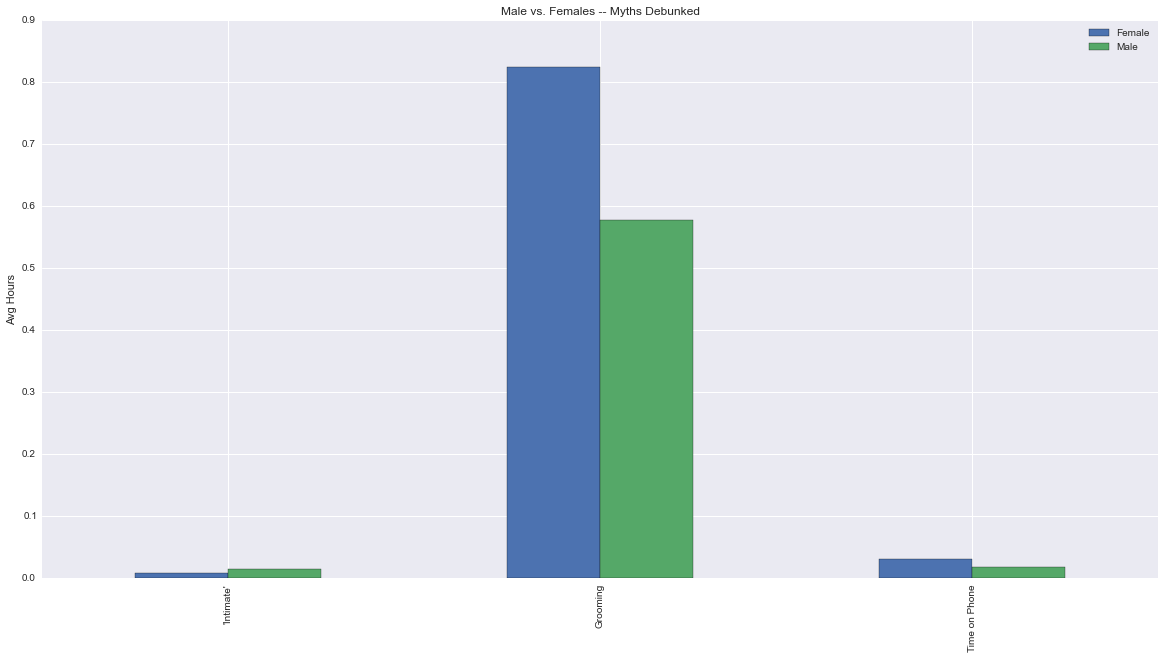

In [50]:
male_vs_female_generic.plot(kind="bar", title="Male vs. Females -- Myths Debunked", figsize=(20,10))
plt.ylabel("Avg Hours")
plt.show()

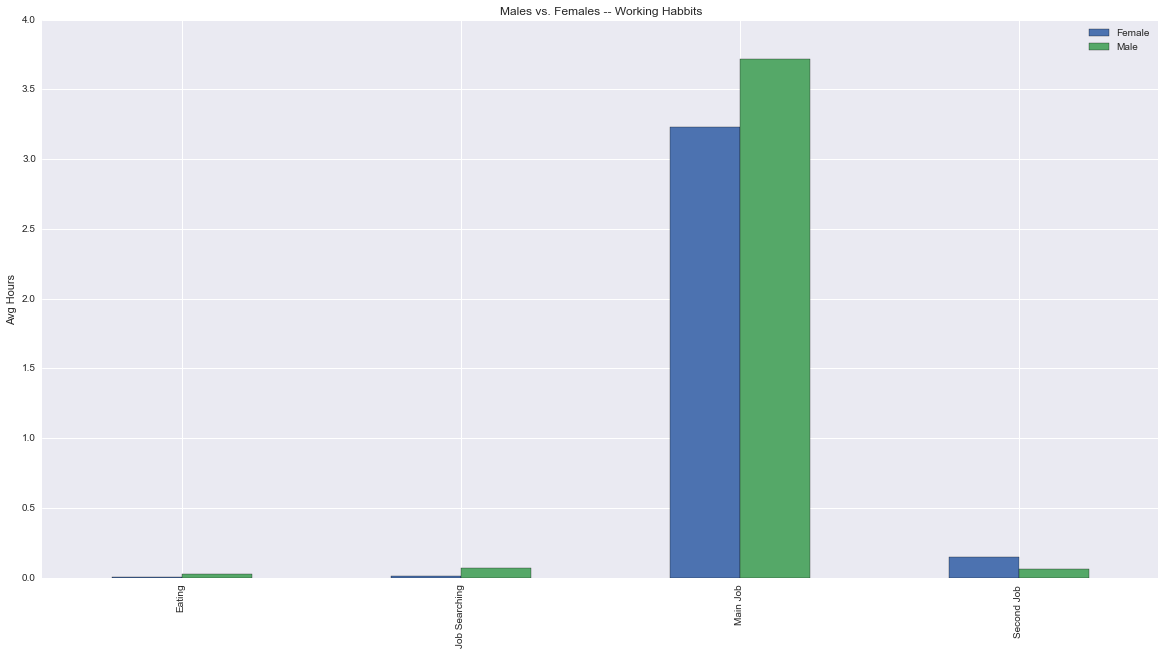

In [51]:
male_vs_female_work.plot(kind="bar", title="Males vs. Females -- Working Habbits", figsize = (20, 10))
plt.ylabel("Avg Hours")
plt.show()

In [73]:
teens_study = ammend_data(summary, teenager_crit, ["t120304", 't060101', 't120101', "TEAGE", "tucaseid"])

/Users/ZSeaborn/Desktop/Homework/atus-analysis/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


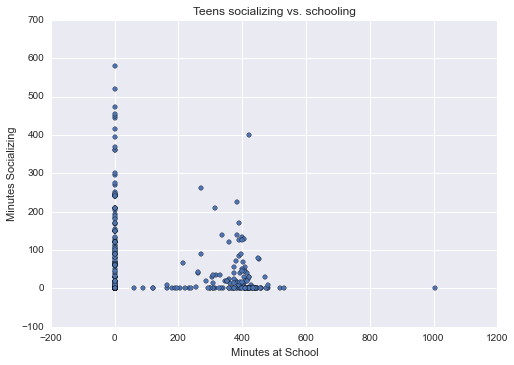

In [77]:
teens_study.plot(kind="scatter", x='t060101', y="t120101", title="Teens socializing vs. schooling")
plt.xlabel("Minutes at School")
plt.ylabel("Minutes Socializing")